<a href="https://colab.research.google.com/github/zahramn14/Skripsi/blob/main/Code_modelling_fix_ara_coba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install unidecode
!pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.1 MB/s eta 0:00:00


In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, re, itertools
from textblob import TextBlob
from html import unescape
from unidecode import unidecode
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!git clone https://github.com/zahramn14/Skripsi.git

Cloning into 'Skripsi'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 556.58 KiB | 11.36 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
#data = pd.read_csv('/content/drive/MyDrive/SKRIPSI ZAHRA/quransplitted.csv')
data = pd.read_csv('/content/drive/MyDrive/SKRIPSI ZAHRA/quransplitted_new.csv')
data.head()

,Unnamed: 0,id,surah,ayat,terjemah,clean_text,topik
0,0,[1.1],Al-Fatihah,1,Dengan menyebut nama Allah Yang Maha Pemurah l...,menyebut nama allah maha pemurah maha penyayang,ibadah
1,1,[1.1],Al-Fatihah,1,Dengan menyebut nama Allah Yang Maha Pemurah l...,menyebut nama allah maha pemurah maha penyayang,iman
2,2,[1.1],Al-Fatihah,1,Dengan menyebut nama Allah Yang Maha Pemurah l...,menyebut nama allah maha pemurah maha penyayang,akhlaq dan adab
3,3,[1.2],Al-Fatihah,2,Segala puji bagi Allah Tuhan semesta alam,puji allah tuhan semesta alam,ibadah
4,4,[1.2],Al-Fatihah,2,Segala puji bagi Allah Tuhan semesta alam,puji allah tuhan semesta alam,iman


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13120 entries, 0 to 13119
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  13120 non-null  int64 
 1   id          13120 non-null  object
 2   surah       13120 non-null  object
 3   ayat        13120 non-null  int64 
 4   terjemah    13120 non-null  object
 5   clean_text  13106 non-null  object
 6   topik       13120 non-null  object
dtypes: int64(2), object(5)
memory usage: 717.6+ KB


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
id,0
surah,0
ayat,0
terjemah,0
clean_text,14
topik,0


In [ ]:
def count_words(text):
    return len(text.split())

In [ ]:
data['clean_text'] = data['clean_text'].astype(str)

In [ ]:
data['count_word_before'] = data['terjemah'].apply(lambda x: count_words(x))
data['count_word_after'] = data['clean_text'].apply(lambda x: count_words(x))
data.head()

,Unnamed: 0,id,surah,ayat,terjemah,clean_text,topik,count_word_before,count_word_after
0,0,[1.1],Al-Fatihah,1,Dengan menyebut nama Allah Yang Maha Pemurah l...,menyebut nama allah maha pemurah maha penyayang,ibadah,10,7
1,1,[1.1],Al-Fatihah,1,Dengan menyebut nama Allah Yang Maha Pemurah l...,menyebut nama allah maha pemurah maha penyayang,iman,10,7
2,2,[1.1],Al-Fatihah,1,Dengan menyebut nama Allah Yang Maha Pemurah l...,menyebut nama allah maha pemurah maha penyayang,akhlaq dan adab,10,7
3,3,[1.2],Al-Fatihah,2,Segala puji bagi Allah Tuhan semesta alam,puji allah tuhan semesta alam,ibadah,7,5
4,4,[1.2],Al-Fatihah,2,Segala puji bagi Allah Tuhan semesta alam,puji allah tuhan semesta alam,iman,7,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13120 entries, 0 to 13119
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         13120 non-null  int64 
 1   id                 13120 non-null  object
 2   surah              13120 non-null  object
 3   ayat               13120 non-null  int64 
 4   terjemah           13120 non-null  object
 5   clean_text         13120 non-null  object
 6   topik              13120 non-null  object
 7   count_word_before  13120 non-null  int64 
 8   count_word_after   13120 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 922.6+ KB


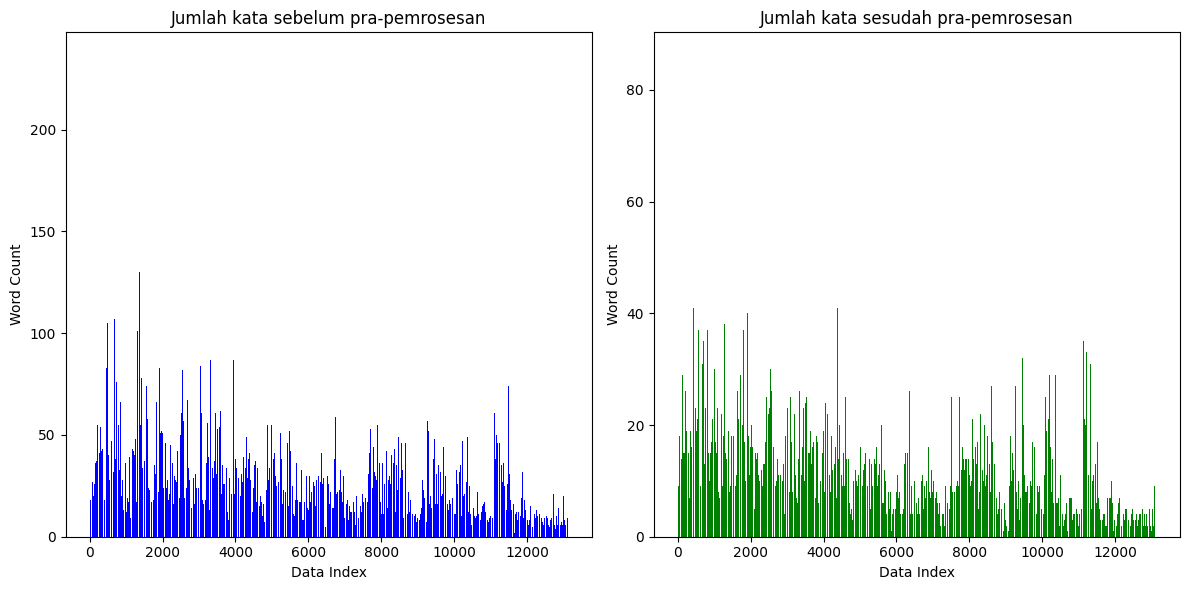

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Membuat histogram untuk 'count_word_before'
axes[0].bar(data.index, data['count_word_before'], color='blue')
axes[0].set_title('Jumlah kata sebelum pra-pemrosesan')
axes[0].set_xlabel('Data Index')
axes[0].set_ylabel('Word Count')

# Membuat histogram untuk 'count_word_after'
axes[1].bar(data.index, data['count_word_after'], color='green')
axes[1].set_title('Jumlah kata sesudah pra-pemrosesan')
axes[1].set_xlabel('Data Index')
axes[1].set_ylabel('Word Count')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
quranTopik = {}
for i, d in data.iterrows():
    if d.topik not in quranTopik.keys():
        if isinstance(d.clean_text, str):
            quranTopik[d.topik] = [d.clean_text]
    else:
        if isinstance(d.clean_text, str):
            quranTopik[d.topik].append(d.clean_text)

for topik, ayat in quranTopik.items():
    quranTopik[topik] = ' '.join(quranTopik[topik])

quranTopik['ibadah']

'menyebut nama allah maha pemurah maha penyayang puji allah tuhan semesta alam engkaulah menyembah engkaulah mohon pertolongan tunjukilah jalan lurus dirikanlah salat tunaikanlah zakat rukuklah beserta rukuk mintalah pertolongan allah sabar salat sesungguhnya sungguh berat kecuali khusyuk ingatlah berfirman masuklah negeri baitulmakdis makanlah hasil buminya enak sukai masukilah pintu gerbangnya bersujud bebaskanlah dosa niscaya ampuni kesalahan kesalahanmu kelak menambah pemberian berbuat mohonkanlah tuhanmu menerangkan hakikat sapi betina sesungguhnya sapi samar sesungguhnya insya allah petunjuk memperoleh sapi ingatlah mengambil janji bani israel menyembah allah berbuat baiklah kaum kerabat anak anak yatim miskin ucapkanlah manusia dirikanlah salat tunaikanlah zakat memenuhi janji kecuali sebahagian berpaling dirikanlah salat tunaikanlah zakat kebaikan usahakan dirimu pahalanya sisi allah sesungguhnya allah maha kerjakan aniaya menghalang halangi menyebut nama allah masjid masjid be

In [ ]:
df_quran = pd.Series(quranTopik).to_frame().reset_index().rename(columns = {'index':'topik', 0:'ayat terkait'})
df_quran

,topik,ayat terkait
0,ibadah,menyebut nama allah maha pemurah maha penyayan...
1,iman,menyebut nama allah maha pemurah maha penyayan...
2,akhlaq dan adab,menyebut nama allah maha pemurah maha penyayan...
3,alquran,jalan engkau anugerahkan nikmat jalan dimurkai...
4,bangsa bangsa terdahulu,jalan engkau anugerahkan nikmat jalan dimurkai...
5,ilmu,allah membalas olok olokan membiarkan teromban...
6,sejarah,keraguan qur wahyukan hamba muhammad buatlah s...
7,makanan dan minuman,naungi awan turunkan kepadamu manna salwa maka...
8,hukum privat,ingatlah mengambil janji bani israel menyembah...
9,hukum pidana jinayah,ingatlah mengambil janji menumpahkan darahmu m...


In [ ]:
df_quran.iloc[[0]]['ayat terkait']

,ayat terkait
0,menyebut nama allah maha pemurah maha penyayan...


In [ ]:
from collections import defaultdict
def generate_N_grams(text,ngram=1):
    words=[word for word in text.split(" ")]
    temp=zip(*[words[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans

In [ ]:
beforeValues=defaultdict(int)
for t in df_quran.iloc[[13]]['ayat terkait']:
    for word in generate_N_grams(t):
        beforeValues[word]+=1

In [ ]:
df_before=pd.DataFrame(sorted(beforeValues.items(),key=lambda x:x[1],reverse=True))
df_before

,0,1
0,laki,16
1,allah,12
2,anak,11
3,istri,10
4,putra,8
...,...,...
168,dikenal,1
169,diganggu,1
170,pengampun,1
171,penyayang,1


In [ ]:
fileStopWords = '/content/Skripsi/stopword_id_pak_taufik.txt'
openStopWords=open(fileStopWords,"r",encoding="utf-8", errors='replace')
stopWords = openStopWords.readlines();openStopWords.close()
stopWords = set([w.lower().strip() for w in stopWords])

lemma_id = StemmerFactory().create_stemmer()

def cleanText(T, lemma=True, min_charLen = 2, max_charLen = 15):
    pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    t = re.sub(pattern,' ',T) #remove urls if any
    pattern = re.compile(r'ftp[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    t = re.sub(pattern,' ',t) #remove urls if any
    t = unescape(t) # html entities fix
    t = t.lower().strip() # lowercase
    t = unidecode(t)
    t = ''.join(''.join(s)[:2] for _, s in itertools.groupby(t)) # remove repetition
    t = t.replace('\n', ' ').replace('\r', ' ')
    listKata = re.sub(r'[^.,_a-zA-Z0-9 -\.]',' ',t)
    listKata = TextBlob(listKata).words
    listKata = [tok for tok in listKata if sum([1 for d in tok if d.isdigit()])==0]
    listKata = [tok for tok in listKata if str(tok) not in stopWords and len(str(tok))>=min_charLen]
    t = ' '.join(listKata) #lemma_id.stem(' '.join(listKata))
    return t # Return kalimat lagi

In [ ]:
vsm = TfidfVectorizer(lowercase=True,smooth_idf= True, sublinear_tf=True,
                                   ngram_range=(1, 2), max_df=0.90, min_df=2)

In [ ]:
quran = vsm.fit_transform(df_quran['ayat terkait']) # "Fit_Transform"
#curhat = vsm.transform(input) # Perhatikan disini hanya "Transform"
N, P = quran.shape
quran

<14x34785 sparse matrix of type '<class 'numpy.float64'>'
	with 122115 stored elements in Compressed Sparse Row format>

In [ ]:
# Langkah 5: Rekomendasi
input_text = cleanText("pemerintah harus adil dalam memberikan hukum. jangan menjadi zalim sesungguhnya allah lah yang maha adil. saya menjadi saksi bahwa negara ini masih belum berlaku adil pada rakyat nya")  # Ganti dengan input pengguna
input_vector = vsm.transform([input_text])

MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.
